# Data Encoding
*Data encoding is a crucial preprocessing step in machine learning that transforms categorical data into numerical format, suitable for model training. It involves converting text or symbolic data into numerical representations that algorithms can understand and process. This is essential as most machine learning models operate on numerical data. The choice of encoding technique depends on the nature of the categorical data and the specific problem being addressed.*

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/cats-dataset/cats_dataset.csv')

# About Dataset
The dataset appears to be a collection of information about cats. It contains the following columns:

* Breed: The breed of the cat (e.g., Russian Blue, Norwegian Forest, Chartreux)
* Age (Years): The age of the cat in years
* Weight (kg): The weight of the cat in kilograms
* Color: The color of the cat's fur (e.g., Tortoiseshell, Brown, Sable)
* Gender: The gender of the cat (Male or Female)
    
Data Types

* Breed: Categorical data
* Age (Years): Numerical data (integer)
* Weight (kg): Numerical data (float)
* Color: Categorical data
* Gender: Categorical data

In [4]:
print(df)

                  Breed  Age (Years)  Weight (kg)          Color  Gender
0          Russian Blue           19            7  Tortoiseshell  Female
1      Norwegian Forest           19            9  Tortoiseshell  Female
2             Chartreux            3            3          Brown  Female
3               Persian           13            6          Sable  Female
4               Ragdoll           10            8          Tabby    Male
..                  ...          ...          ...            ...     ...
995   British Shorthair           19            5           Gray  Female
996   British Shorthair           11            2        Bicolor  Female
997            Savannah           12            5        Bicolor  Female
998  American Shorthair            8            3  Tortoiseshell  Female
999           Chartreux           11            4          Sable  Female

[1000 rows x 5 columns]


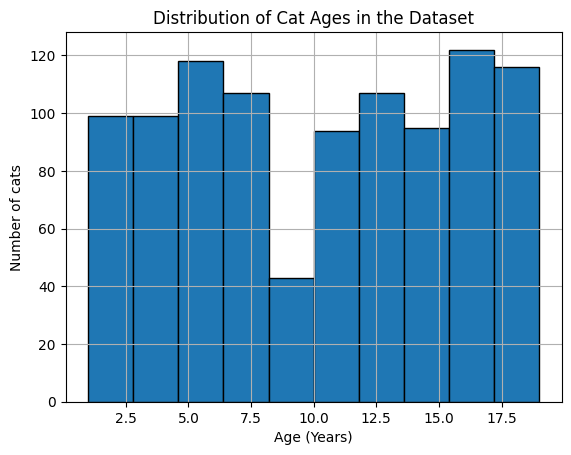

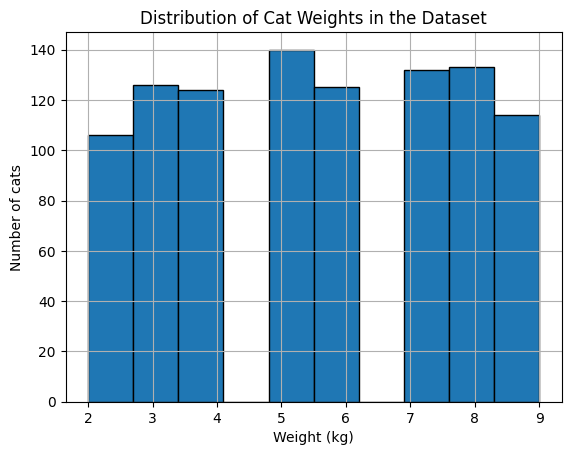

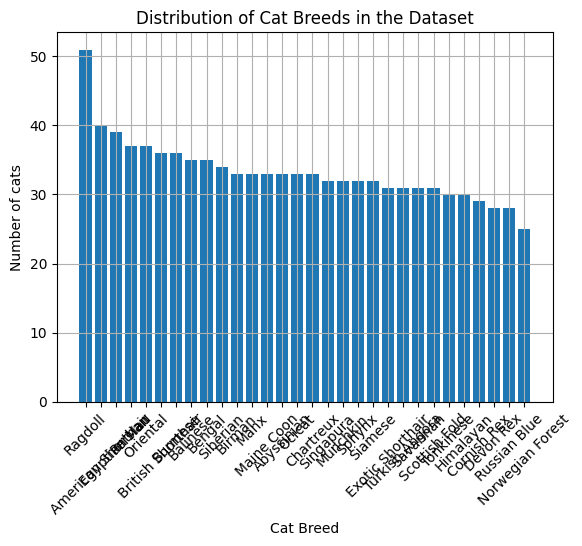

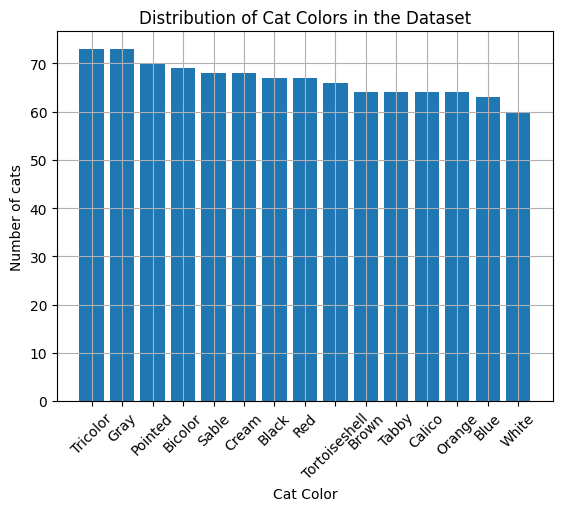

In [22]:
plt.hist(df['Age (Years)'], bins=10, edgecolor='black')
plt.xlabel('Age (Years)')
plt.ylabel('Number of cats')
plt.title('Distribution of Cat Ages in the Dataset')
plt.grid(True)
plt.show()

# Distribution of cat weights
plt.hist(df['Weight (kg)'], bins=10, edgecolor='black')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of cats')
plt.title('Distribution of Cat Weights in the Dataset')
plt.grid(True)
plt.show()

# Cat breed counts
plt.bar(df['Breed'].value_counts().index, df['Breed'].value_counts().values)
plt.xlabel('Cat Breed')
plt.ylabel('Number of cats')
plt.title('Distribution of Cat Breeds in the Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Cat color counts
plt.bar(df['Color'].value_counts().index, df['Color'].value_counts().values)
plt.xlabel('Cat Color')
plt.ylabel('Number of cats')
plt.title('Distribution of Cat Colors in the Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [5]:
categorical_cols = ['Breed']

# Dummy Encoding
Dummy encoding is similar to binary encoding but uses N-1 binary columns to represent N categories. It's essentially one-hot encoding without the last column, as one of the categories can be inferred from the absence of values in the other columns. This technique is often used to prevent the dummy variable trap, which can occur when including all binary columns in a linear regression model.

In [6]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [7]:
print(df_encoded)

     Age (Years)  Weight (kg)          Color  Gender  Breed_Abyssinian  \
0             19            7  Tortoiseshell  Female             False   
1             19            9  Tortoiseshell  Female             False   
2              3            3          Brown  Female             False   
3             13            6          Sable  Female             False   
4             10            8          Tabby    Male             False   
..           ...          ...            ...     ...               ...   
995           19            5           Gray  Female             False   
996           11            2        Bicolor  Female             False   
997           12            5        Bicolor  Female             False   
998            8            3  Tortoiseshell  Female             False   
999           11            4          Sable  Female             False   

     Breed_American Shorthair  Breed_Balinese  Breed_Bengal  Breed_Birman  \
0                       False     

In [8]:
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df), columns=encoder.get_feature_names_out())

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
df_encoded

,Breed_Abyssinian,Breed_American Shorthair,Breed_Balinese,Breed_Bengal,Breed_Birman,Breed_British Shorthair,Breed_Burmese,Breed_Chartreux,Breed_Cornish Rex,Breed_Devon Rex,...,Color_Orange,Color_Pointed,Color_Red,Color_Sable,Color_Tabby,Color_Tortoiseshell,Color_Tricolor,Color_White,Gender_Female,Gender_Male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# One-Hot Encoding
One-hot encoding is a popular technique that creates a new binary column for each category of a categorical feature. Each row of the encoded data has a value of 1 for the corresponding category and 0 for all other categories. This method effectively represents categorical data without introducing any ordinal relationship between the categories. However, it can lead to increased dimensionality, especially for features with many categories.

In [10]:
data = {'category': ['A', 'B', 'A', 'C'],
        'value': [1, 2, 3, 4]}
df2 = pd.DataFrame(data)

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df2), columns=encoder.get_feature_names_out())

print(df_encoded)

   category_A  category_B  category_C  value_1  value_2  value_3  value_4
0         1.0         0.0         0.0      1.0      0.0      0.0      0.0
1         0.0         1.0         0.0      0.0      1.0      0.0      0.0
2         1.0         0.0         0.0      0.0      0.0      1.0      0.0
3         0.0         0.0         1.0      0.0      0.0      0.0      1.0


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Label Encoding
Label encoding assigns a unique integer to each category of a categorical feature. It's a simple method but should be used cautiously, as it assumes an ordinal relationship between the categories, which might not be appropriate for nominal data. Label encoding is suitable for ordinal data where the order of categories is meaningful.

In [14]:
le = LabelEncoder()
df['Breed_Lable_encoded'] = le.fit_transform(df['Breed'])
print(df)

                  Breed  Age (Years)  Weight (kg)          Color  Gender  \
0          Russian Blue           19            7  Tortoiseshell  Female   
1      Norwegian Forest           19            9  Tortoiseshell  Female   
2             Chartreux            3            3          Brown  Female   
3               Persian           13            6          Sable  Female   
4               Ragdoll           10            8          Tabby    Male   
..                  ...          ...          ...            ...     ...   
995   British Shorthair           19            5           Gray  Female   
996   British Shorthair           11            2        Bicolor  Female   
997            Savannah           12            5        Bicolor  Female   
998  American Shorthair            8            3  Tortoiseshell  Female   
999           Chartreux           11            4          Sable  Female   

     Breed_encoded  Breed_Lable_encoded  
0               21                   21  
1  

# Ordinal Encoding
Ordinal encoding is similar to label encoding but is explicitly used for ordinal data, where the categories have a natural order. It assigns integers to categories based on their order. This method preserves the ordinal relationship between categories and can be useful in certain cases. However, it's important to ensure that the assigned integer values accurately reflect the order of the categories.

In [16]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = df['Breed_encoded'].values.reshape(-1, 1)
binary_encoded = onehot_encoder.fit_transform(integer_encoded)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
integer_encoded

array([[21],
       [16],
       [ 7],
       [19],
       [20],
       [17],
       [20],
       [ 0],
       [18],
       [10],
       [ 7],
       [ 1],
       [ 3],
       [ 8],
       [ 5],
       [ 6],
       [ 6],
       [21],
       [26],
       [13],
       [ 5],
       [ 0],
       [ 8],
       [29],
       [ 6],
       [12],
       [27],
       [14],
       [25],
       [ 4],
       [18],
       [ 2],
       [10],
       [ 9],
       [10],
       [27],
       [16],
       [16],
       [19],
       [ 1],
       [20],
       [ 6],
       [12],
       [10],
       [11],
       [10],
       [10],
       [29],
       [ 0],
       [19],
       [13],
       [18],
       [14],
       [19],
       [23],
       [ 2],
       [ 8],
       [20],
       [22],
       [ 1],
       [ 8],
       [15],
       [24],
       [19],
       [19],
       [ 3],
       [ 7],
       [27],
       [ 5],
       [ 4],
       [ 2],
       [12],
       [16],
       [ 3],
       [18],
       [23],
       [26],

# Binary Encoding
Binary encoding is a technique that represents each category of a categorical feature as a binary code. It creates multiple binary columns, where each column represents a specific category. A value of 1 indicates the presence of the category, and 0 indicates its absence. This method is suitable for categorical features with a large number of categories, as it helps to reduce dimensionality compared to one-hot encoding.

In [18]:
print(binary_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
